In [1]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d parthplc/medical-image-dataset

!unzip medical-image-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/parthplc/medical-image-dataset
License(s): unknown
 84% 11.0M/13.0M [00:01<00:00, 11.7MB/s]
100% 13.0M/13.0M [00:01<00:00, 7.42MB/s]
Archive:  medical-image-dataset.zip
  inflating: Dataset/1.jpg           
  inflating: Dataset/10.jpg          
  inflating: Dataset/100.jpg         
  inflating: Dataset/101.jpg         
  inflating: Dataset/102.jpg         
  inflating: Dataset/103.jpg         
  inflating: Dataset/104.jpg         
  inflating: Dataset/105.jpg         
  inflating: Dataset/106.jpg         
  inflating: Dataset/107.jpg         
  inflating: Dataset/108.jpg         
  inflating: Dataset/109.jpg         
  inflating: Dataset/11.jpg          
  inflating: Dataset/110.jpg         
  inflating: Dataset/111.jpg         
  inflating: Dataset/112.jpg         
  inflating: Dataset/113.jpg         
  inflating: Dataset/114.jpg         
  inflating: Dataset/115.jpg         
  inflating: Dataset/116.jpg  

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Dataset/3.jpg
/content/Dataset/68.jpg
/content/Dataset/42.jpg
/content/Dataset/29.jpg
/content/Dataset/60.jpg
/content/Dataset/23.jpg
/content/Dataset/63.jpg
/content/Dataset/110.jpg
/content/Dataset/7.jpg
/content/Dataset/104.jpg
/content/Dataset/24.jpg
/content/Dataset/114.jpg
/content/Dataset/79.jpg
/content/Dataset/33.jpg
/content/Dataset/109.jpg
/content/Dataset/102.jpg
/content/Dataset/36.jpg
/content/Dataset/77.jpg
/content/Dataset/93.jpg
/content/Dataset/95.jpg
/content/Dataset/56.jpg
/content/Dataset/92.jpg
/content/Dataset/34.jpg
/content/Dataset/31.jpg
/content/Dataset/57.jpg
/content/Dataset/116.jpg
/content/Dataset/78.jpg
/content/Dataset/66.jpg
/content/Dataset/43.jpg
/content/Dataset/5.jpg
/content/Dataset/26.jpg
/content/Dataset/83.jpg
/content/Dataset/75.jpg
/content/Dataset/13.jpg
/content/Dataset/105.jpg
/content/Dataset/27.jpg
/content/Dataset/72.jpg
/content/Dataset/94.jpg
/content/Dataset/71.jpg
/content/Dataset/17.jpg
/content/Dataset/55.jpg
/content/Dat

In [4]:
from keras.preprocessing import image

In [5]:
train_images = sorted(os.listdir('/content/Dataset'))

In [8]:
train_image = []
for im in train_images:
    img = image.load_img('/content/Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

In [9]:
import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
    plt.show()


In [10]:
def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy
noised_df= []

for img in train_df:
    noisy= add_noice(img)
    noised_df.append(noisy)

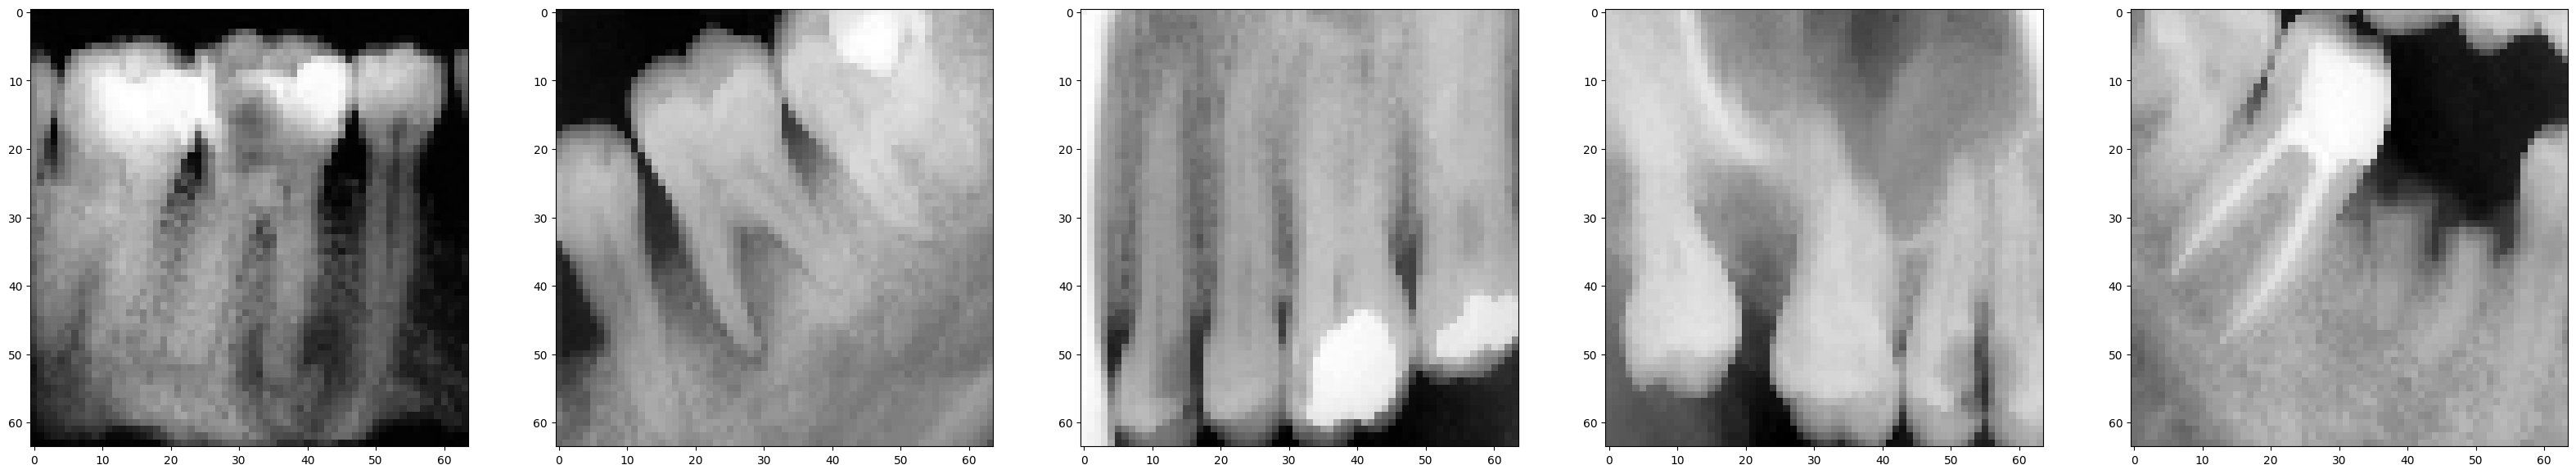

In [11]:
noised_df= np.array(noised_df)
show_img(train_df)

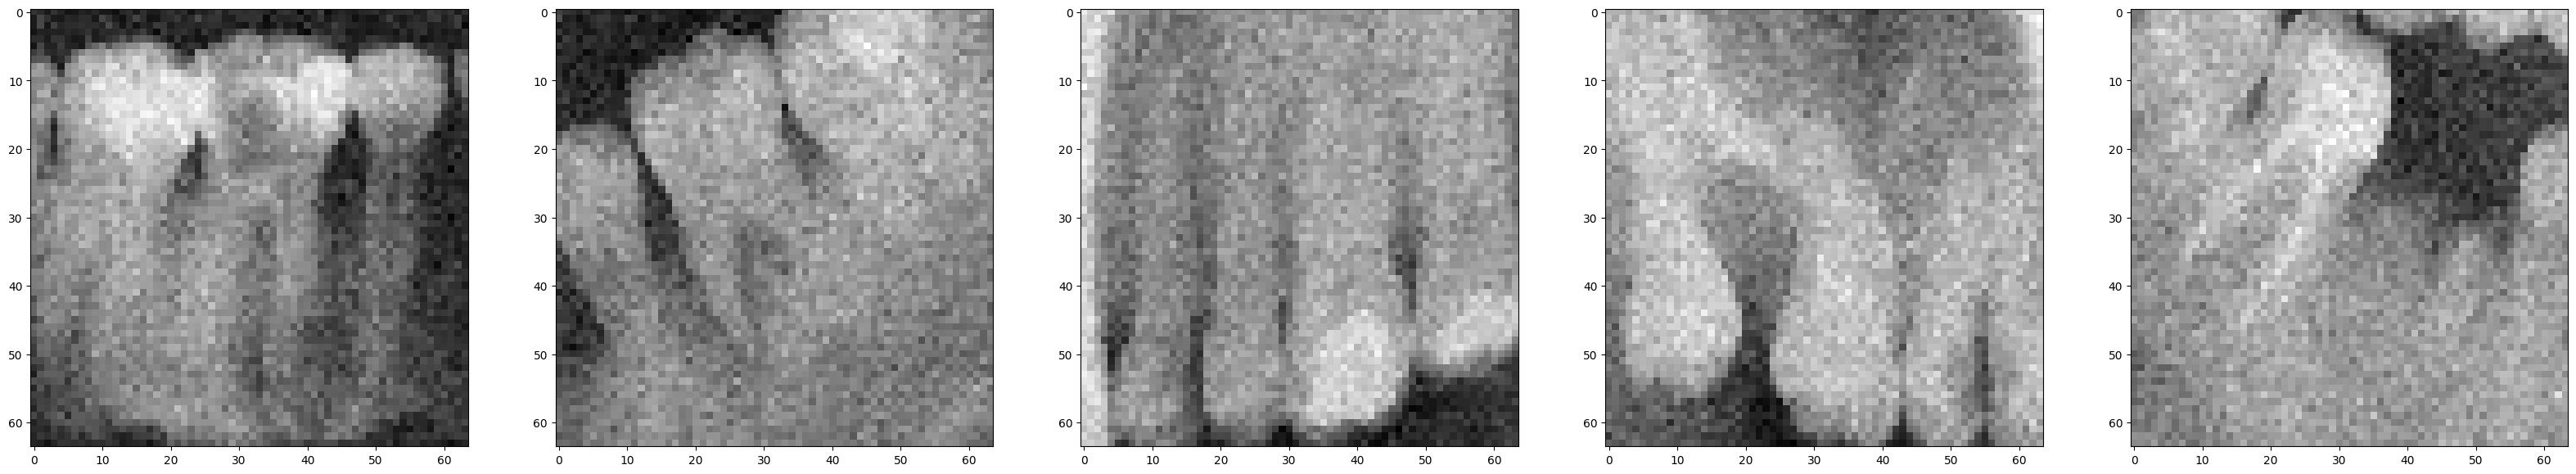

In [12]:
show_img(noised_df)

In [13]:
noised_df.shape

(120, 64, 64, 1)

In [14]:
train_df.shape

(120, 64, 64, 1)

In [15]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]
xnoised.shape

(100, 64, 64, 1)

In [17]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K

def autoencoder():

    input_img = Input(shape=(64,64,1), name='image_input')

    #enoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)

    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)

    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

In [18]:
model= autoencoder()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsample1 (UpSampling2D)             │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsample2 (UpSampling2D)             │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,001 (437.50 KB)

 Trainable params: 112,001 (437.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=40, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.6816 - val_loss: 0.6181
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6188 - val_loss: 0.6051
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5983 - val_loss: 0.5863
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5846 - val_loss: 0.5797
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5788 - val_loss: 0.5753
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5783 - val_loss: 0.5718
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5675 - val_loss: 0.5696
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5670 - val_loss: 0.5668
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5713 - val_loss: 0.5657
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5592 - val_loss: 0.5648
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5636 - val_loss: 0.5639
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5576 - val_

In [21]:
xtrain= train_df[100:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


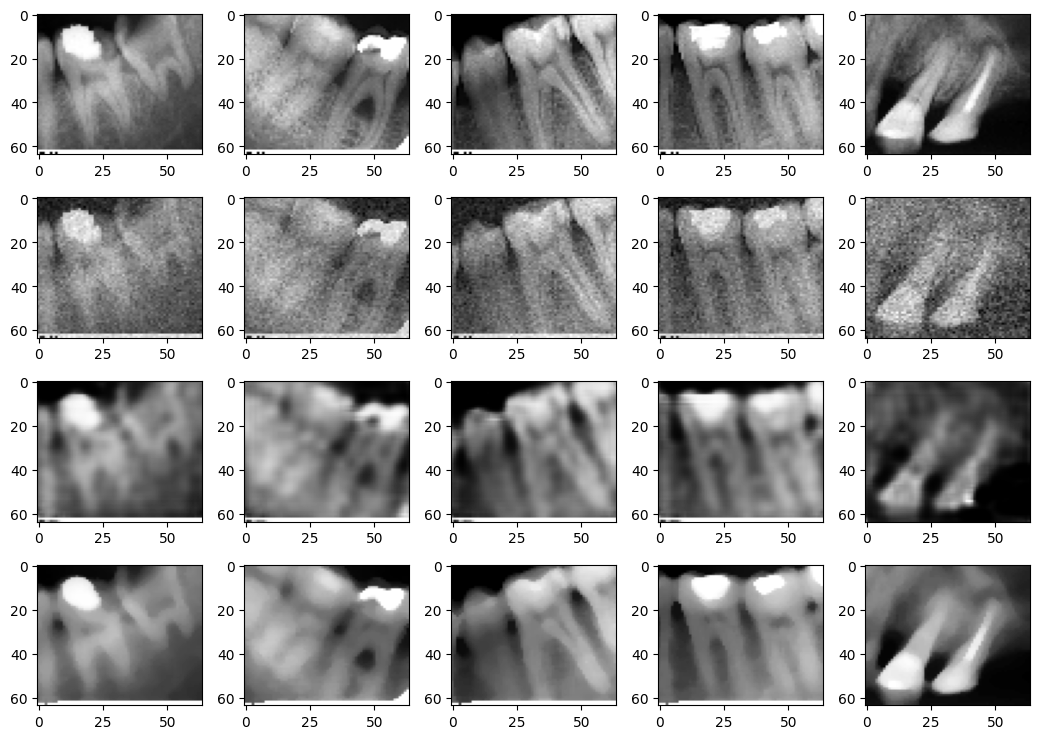

In [22]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')

    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

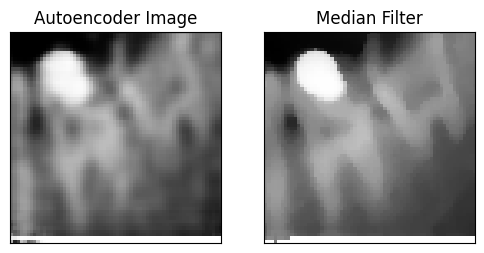

In [23]:
new_image = cv2.medianBlur(xtrain[0], (5))
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(pred[0].reshape(64,64), cmap='gray')
plt.title('Autoencoder Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
from math import log10, sqrt

def PSNR(original, denoiced):
    mse = np.mean((original - denoiced) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

value1 = PSNR(xtest[0], new_image)
value2 = PSNR(xtest[0], pred[0])

print(f"PSNR value for Denoised image is {value2} dB while for Median filtered image is {value1} dB")

PSNR value for Denoised image is 69.8628543138876 dB while for Median filtered image is 58.438609675914876 dB


CNN and MLP

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training CNN...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7714 - loss: 0.7442 - val_accuracy: 0.9742 - val_loss: 0.0822
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9640 - loss: 0.1192 - val_accuracy: 0.9832 - val_loss: 0.0553
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9753 - loss: 0.0839 - val_accuracy: 0.9864 - val_loss: 0.0468
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0662 - val_accuracy: 0.9876 - val_loss: 0.0434
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9887 - val_loss: 0.0407
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0517 - val_accuracy: 0.9893 - val_loss: 0.0370
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9896 - val_loss: 0.0345
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0407 - 

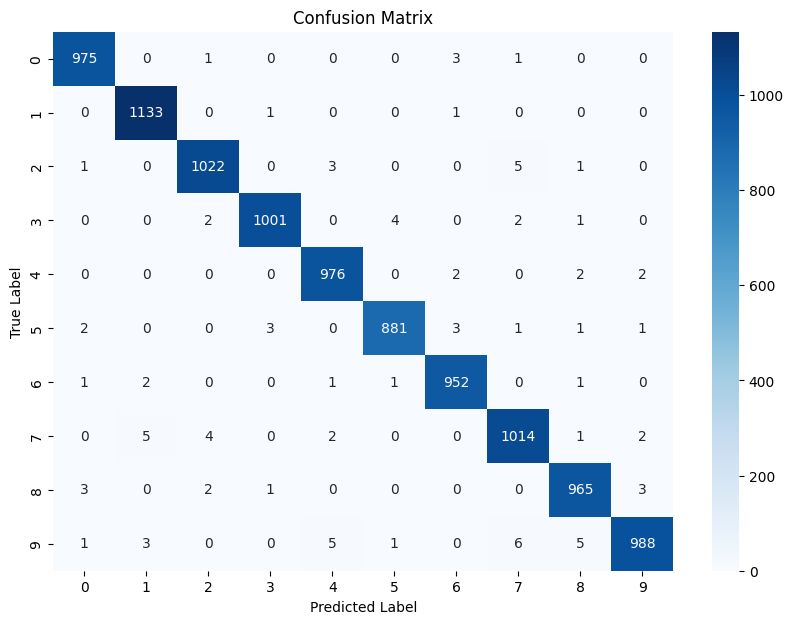

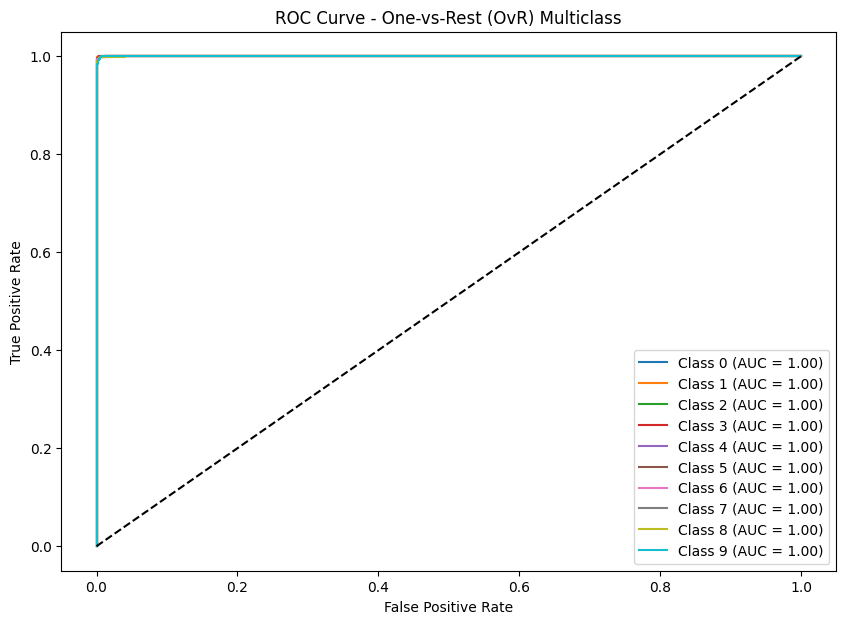

Training MLP...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8650 - loss: 0.4576 - val_accuracy: 0.9655 - val_loss: 0.1195
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1029 - val_accuracy: 0.9693 - val_loss: 0.0960
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9747 - val_loss: 0.0879
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9692 - val_loss: 0.1057
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9786 - val_loss: 0.0767
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9809 - val_loss: 0.0769
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9948 - loss: 0.0162 - 

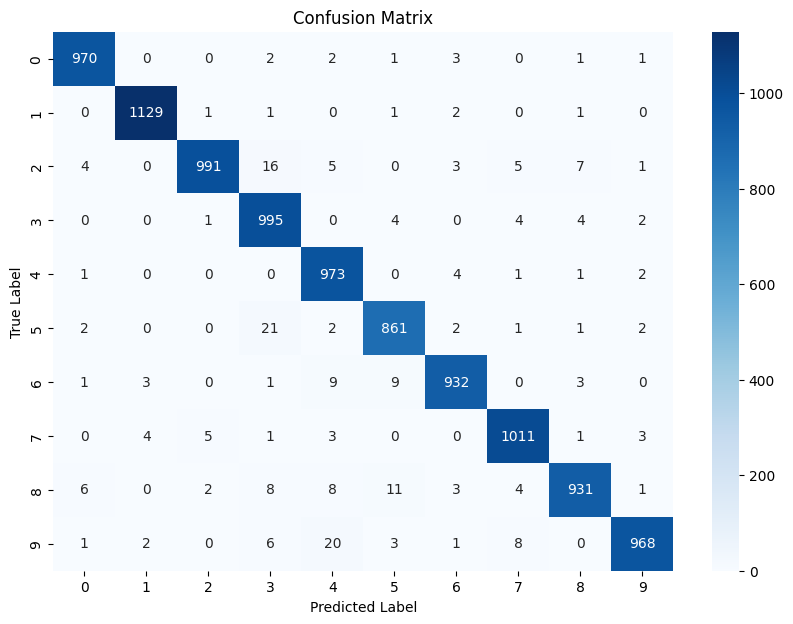

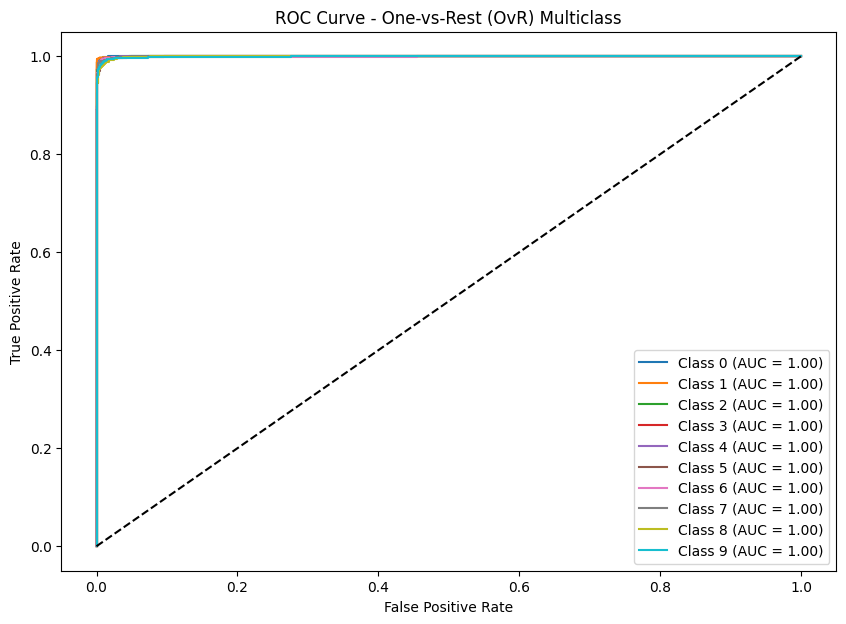

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset (replace with your dataset)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Function to plot ROC curve for multiclass
def plot_roc_curve_multiclass(y_true, y_pred):
    # Convert to one-hot if not already
    y_true = label_binarize(y_true, classes=np.arange(10))

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_true[:, i], y_pred[:, i])

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 7))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - One-vs-Rest (OvR) Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Confusion matrix plotting
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate the model (Accuracy, Precision, Recall, F1, ROC-AUC)
def evaluate_model(y_true, y_pred, y_prob):
    y_true_class = np.argmax(y_true, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class, average='macro')
    recall = recall_score(y_true_class, y_pred_class, average='macro')
    f1 = f1_score(y_true_class, y_pred_class, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_class, y_pred_class)
    plot_confusion_matrix(cm, labels=list(range(10)))

    # Plot ROC curve (One-vs-Rest)
    plot_roc_curve_multiclass(y_true_class, y_prob)

# CNN architecture
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# MLP architecture
def mlp_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_prob = model.predict(X_test)

    # Evaluate the model
    print(f"Evaluating {model_name}...")
    evaluate_model(y_test, y_pred, y_prob)

# Initialize models
cnn = cnn_model()
mlp = mlp_model()

# Train and evaluate CNN
train_and_evaluate(cnn, "CNN")

# Train and evaluate MLP
train_and_evaluate(mlp, "MLP")

VGG-like CNN, ResNet-like CNN, and Autoencoder

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training CNN...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7622 - loss: 0.7504 - val_accuracy: 0.9765 - val_loss: 0.0812
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9622 - loss: 0.1278 - val_accuracy: 0.9830 - val_loss: 0.0563
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9750 - loss: 0.0855 - val_accuracy: 0.9859 - val_loss: 0.0501
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0717 - val_accuracy: 0.9866 - val_loss: 0.0438
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9833 - loss: 0.0584 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9852 - loss: 0.0512 - val_accuracy: 0.9890 - val_loss: 0.0385
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9896 - val_loss: 0.0371
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9881 - loss: 0.0405 - 

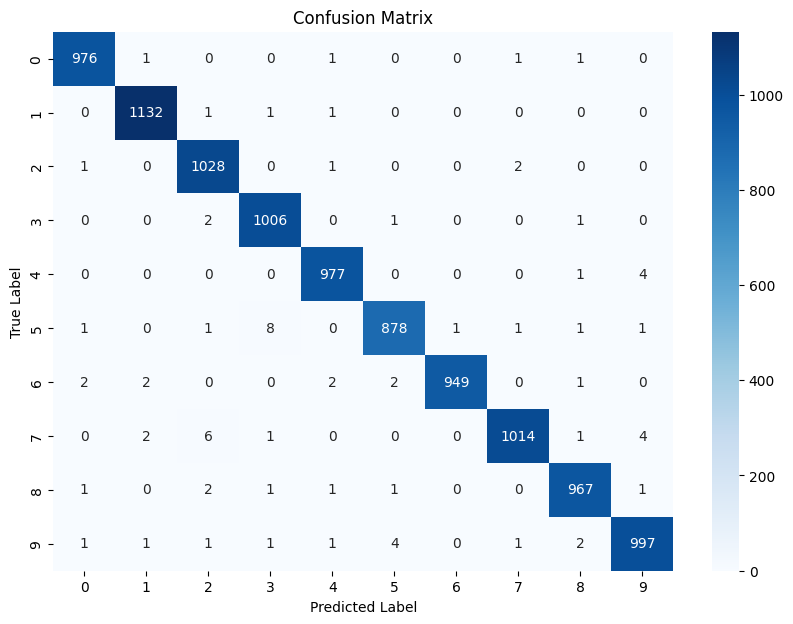

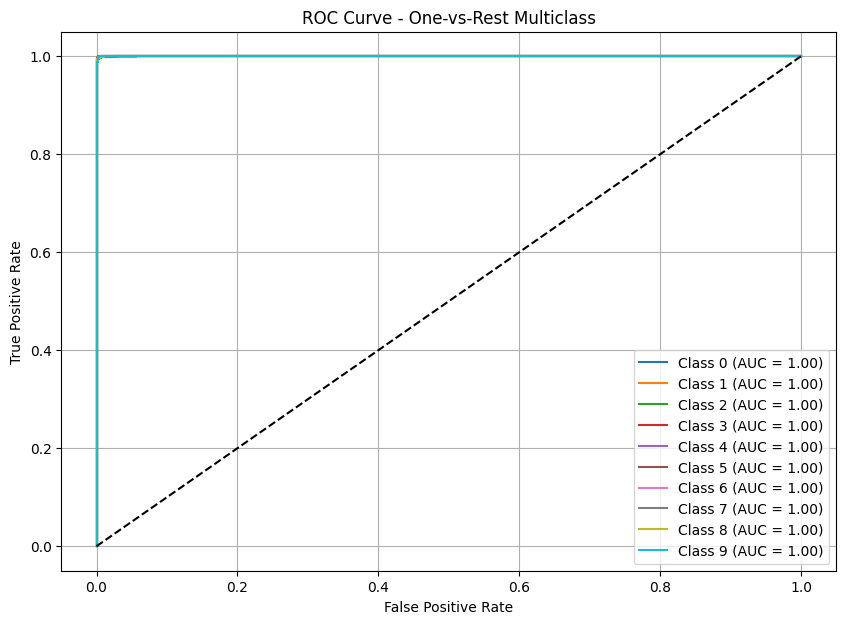

Training MLP...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8634 - loss: 0.4671 - val_accuracy: 0.9632 - val_loss: 0.1213
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0983 - val_accuracy: 0.9697 - val_loss: 0.1032
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9751 - val_loss: 0.0845
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accuracy: 0.9762 - val_loss: 0.0787
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9759 - val_loss: 0.0907
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9786 - val_loss: 0.0894
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9965 - loss: 0.0118 - 

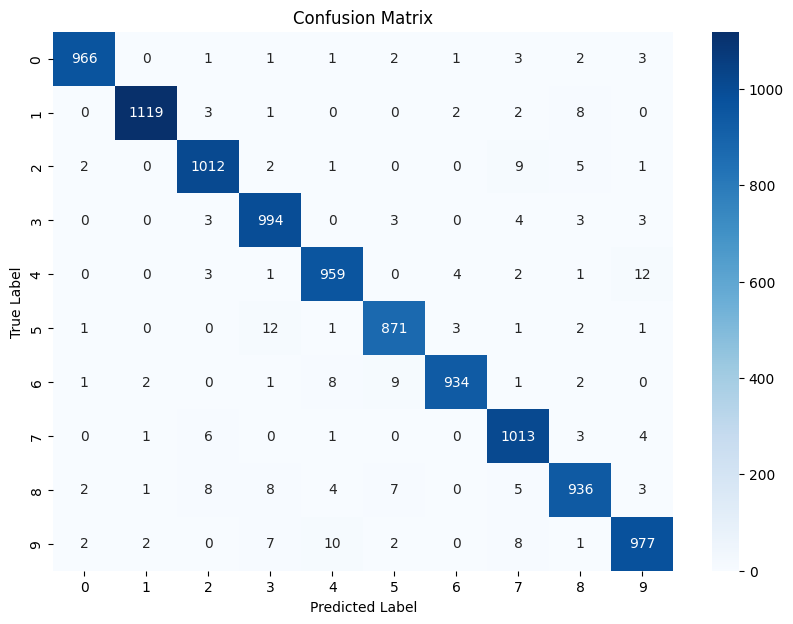

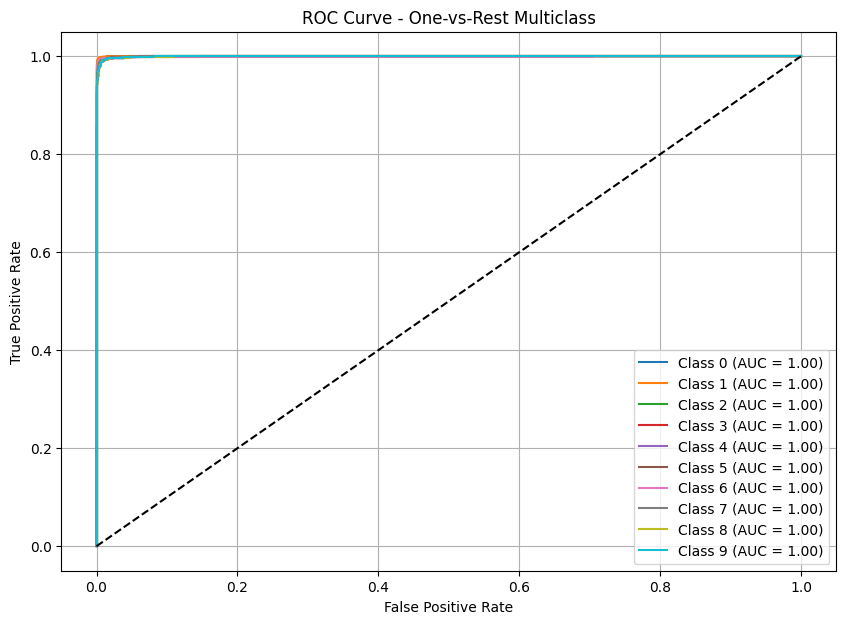

Training VGG-like CNN...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8609 - loss: 0.4183 - val_accuracy: 0.9837 - val_loss: 0.0539
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9833 - loss: 0.0583 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 0.9906 - val_loss: 0.0312
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9917 - loss: 0.0295 - val_accuracy: 0.9905 - val_loss: 0.0338
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9922 - val_loss: 0.0246
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9916 - val_loss: 0.0294
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0

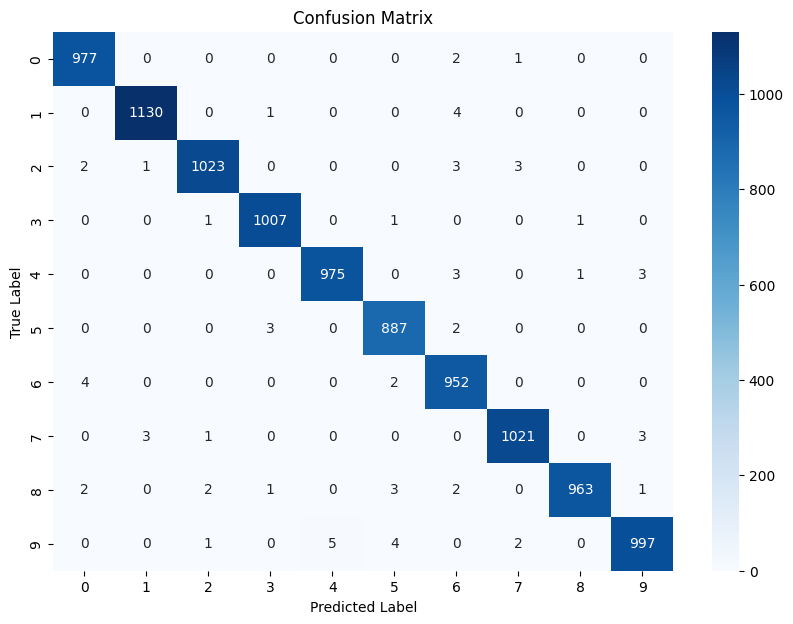

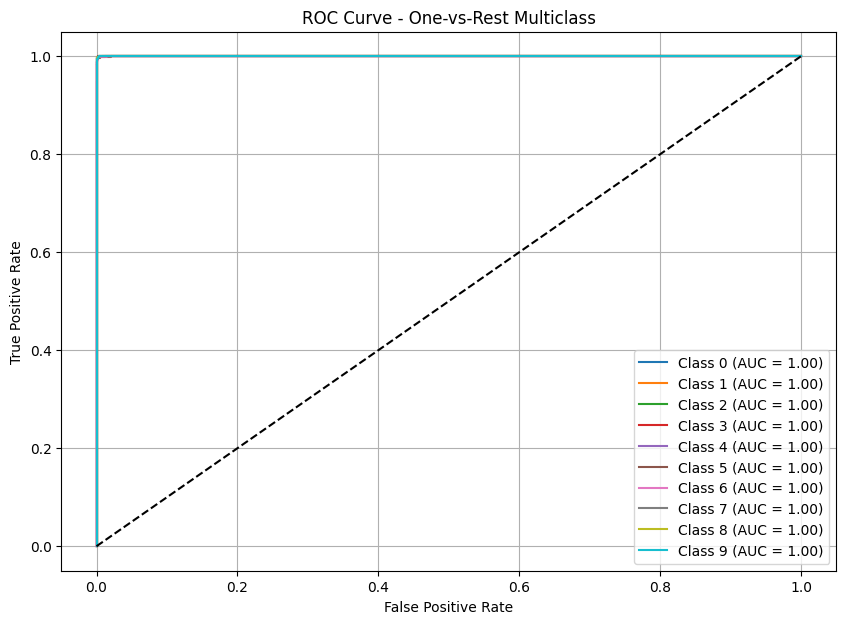

Training ResNet-like CNN...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.4344 - loss: 2.0402 - val_accuracy: 0.8624 - val_loss: 1.1278
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6524 - loss: 0.8642 - val_accuracy: 0.9703 - val_loss: 0.1221
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.6674 - loss: 0.8051 - val_accuracy: 0.9750 - val_loss: 0.0984
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6928 - loss: 0.7302 - val_accuracy: 0.9793 - val_loss: 0.0945
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7442 - loss: 0.6143 - val_accuracy: 0.9808 - val_loss: 0.0734
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8187 - loss: 0.4610 - val_accuracy: 0.9831 - val_loss: 0.0610
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8933 - loss: 0.2906 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accura

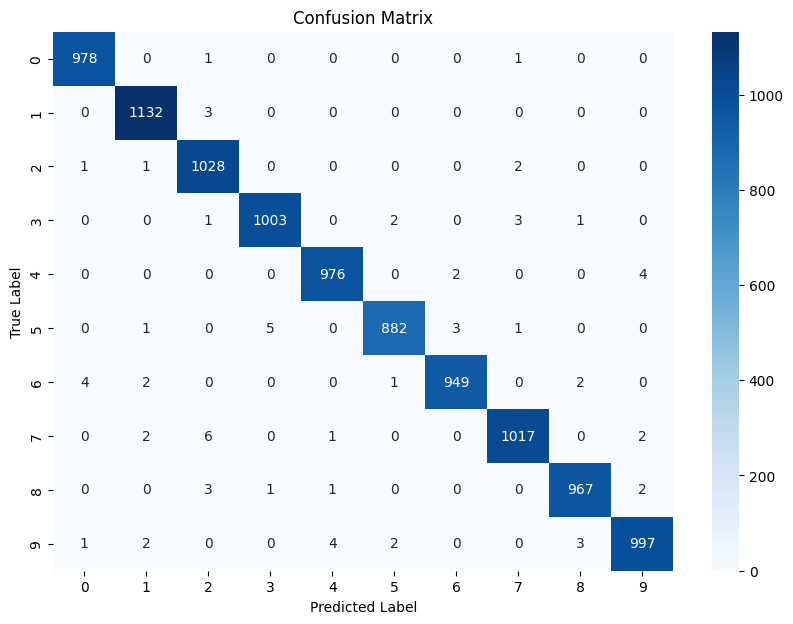

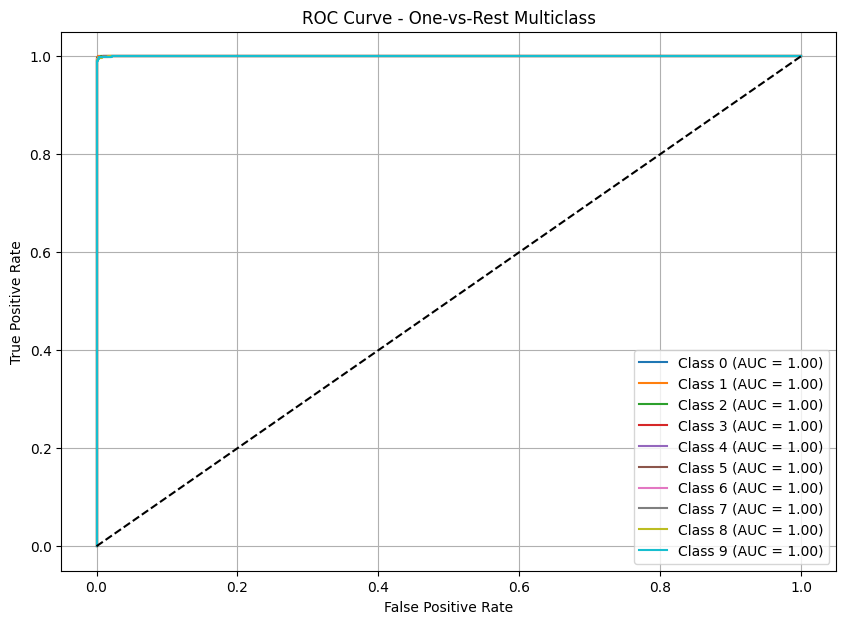

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, UpSampling2D, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import label_binarize

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Function to plot ROC curve for multiclass
def plot_roc_curve_multiclass(y_test, y_pred):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 7))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - One-vs-Rest Multiclass')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Confusion matrix plotting
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate the model (Accuracy, Precision, Recall, F1, ROC-AUC)
def evaluate_model(y_true, y_pred, y_prob):
    y_true_class = np.argmax(y_true, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class, average='macro')
    recall = recall_score(y_true_class, y_pred_class, average='macro')
    f1 = f1_score(y_true_class, y_pred_class, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_class, y_pred_class)
    plot_confusion_matrix(cm, labels=list(range(10)))

    # Plot ROC curve for multiclass
    plot_roc_curve_multiclass(y_true, y_prob)

# CNN architecture
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# MLP architecture
def mlp_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# VGG-like CNN architecture
def vgg_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1), padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ResNet-like CNN architecture
def resnet_model():
    input_img = Input(shape=(28,28,1))

    # First conv block
    x = Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)

    # Second conv block (residual)
    residual = x
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = x + residual

    # Third conv block
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_prob = model.predict(X_test)

    # Evaluate the model
    print(f"Evaluating {model_name}...")
    evaluate_model(y_test, y_pred, y_prob)

# Initialize models
cnn = cnn_model()
mlp = mlp_model()
vgg = vgg_model()
resnet = resnet_model()

# Train and evaluate CNN
train_and_evaluate(cnn, "CNN")

# Train and evaluate MLP
train_and_evaluate(mlp, "MLP")

# Train and evaluate VGG-like CNN
train_and_evaluate(vgg, "VGG-like CNN")

# Train and evaluate ResNet-like CNN
train_and_evaluate(resnet, "ResNet-like CNN")